---

<h1 style="color:#012eba">Introduction to Image Processing with Python</h1>
<h1 style="color:#012eba">Episode 5: Image Segmentation - Part 1</h1>

---

*DASCI 261 - Introduction to Image Processing*

*Prepared by Erika G. Lacson*

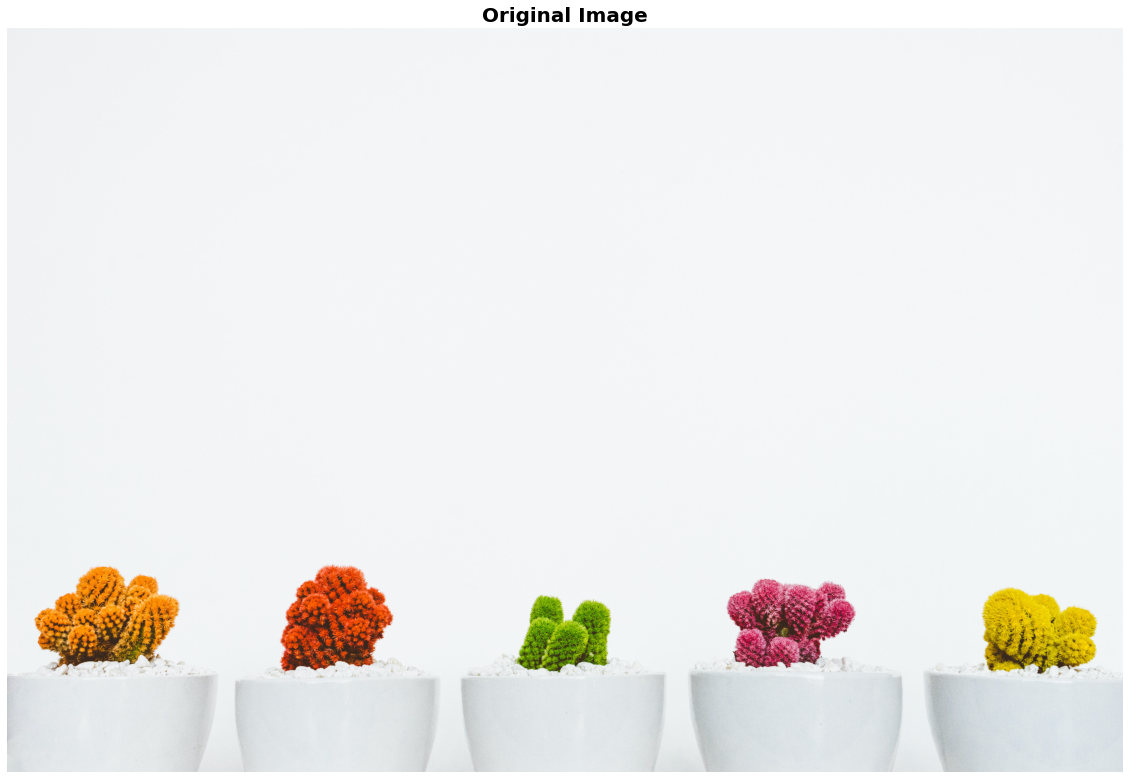

Photo by Scott Webb on Unsplash

---
<h2 style="color:#ff0090">Introduction</h2>


Welcome back, my fellow image processing enthusiasts! In our fifth episode, we’re diving straight into the heart of image analysis — Image Segmentation! This is the process of partitioning an image into multiple segments, each corresponding to different objects or parts of objects. 🧩 It’s the backbone of many computer vision tasks like object detection, facial recognition, and medical imaging.

In this two-part exploration of Image Segmentation, here’s the exciting stuff we’re going to unpack:

- Thresholding and Otsu's Method ⚖️ (This episode)
- Color Image Segmentation 🌈 (This episode)
- Chromaticity Segmentation 🎨 (Next episode)
- Image Differencing 🔄 (Next episode)

For this episode, our journey will begin with:

---
<h2 style="color:#ff0090">A. Thresholding and Otsu's Method</h2>

Our first stop is the world of <b>Thresholding and Otsu’s Method</b>. It’s the first step into our segmentation adventure, where we’ll find out how simple yet effective methods like these can partition an image into two parts — foreground and background, based on the intensity values of its pixels.

But how do we decide the threshold value? That’s where Otsu’s method comes in handy. Remember Otsu? The one we used to automatically assign the threshold for our Binary Image? This is it now. In this episode, Otsu’s Method or Otsu’s Thresholding will be our main topic. To recap, this nifty method or thresholding technique calculates the optimal threshold value that maximizes the between-class variance, making it an excellent tool for automatic threshold selection. 🏆

Let’s start by importing our libraries and displaying our image:

In [51]:
# Import libraries
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, rgb2hsv
from skimage.filters import threshold_otsu

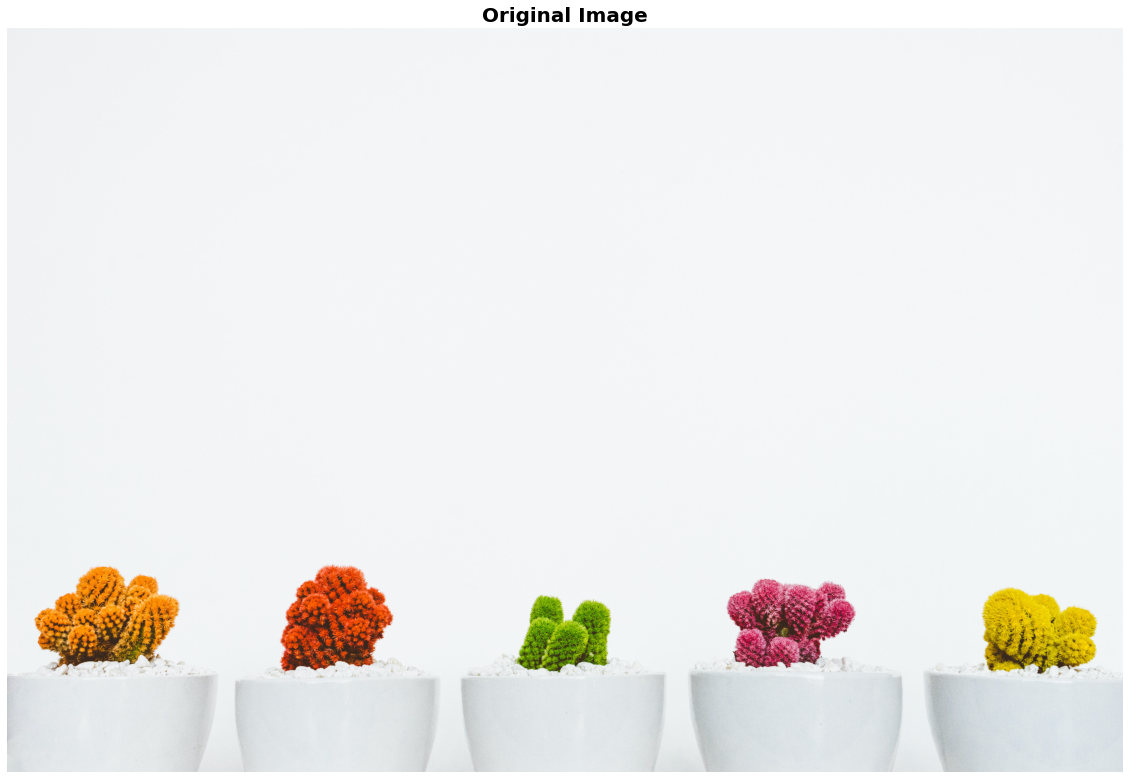

In [9]:
original_image = imread('plants.jpg')
plt.figure(figsize=(20,20))
plt.imshow(original_image)
plt.title('Original Image', fontsize=20, weight='bold')
plt.axis('off')
plt.show()

Photo by Scott Webb on Unsplash

Previously, when we want to binarize our image, we perform a two-step process of converting the image to grayscale then setting any threshold we want, usually 0.50, to convert it to a binary image:

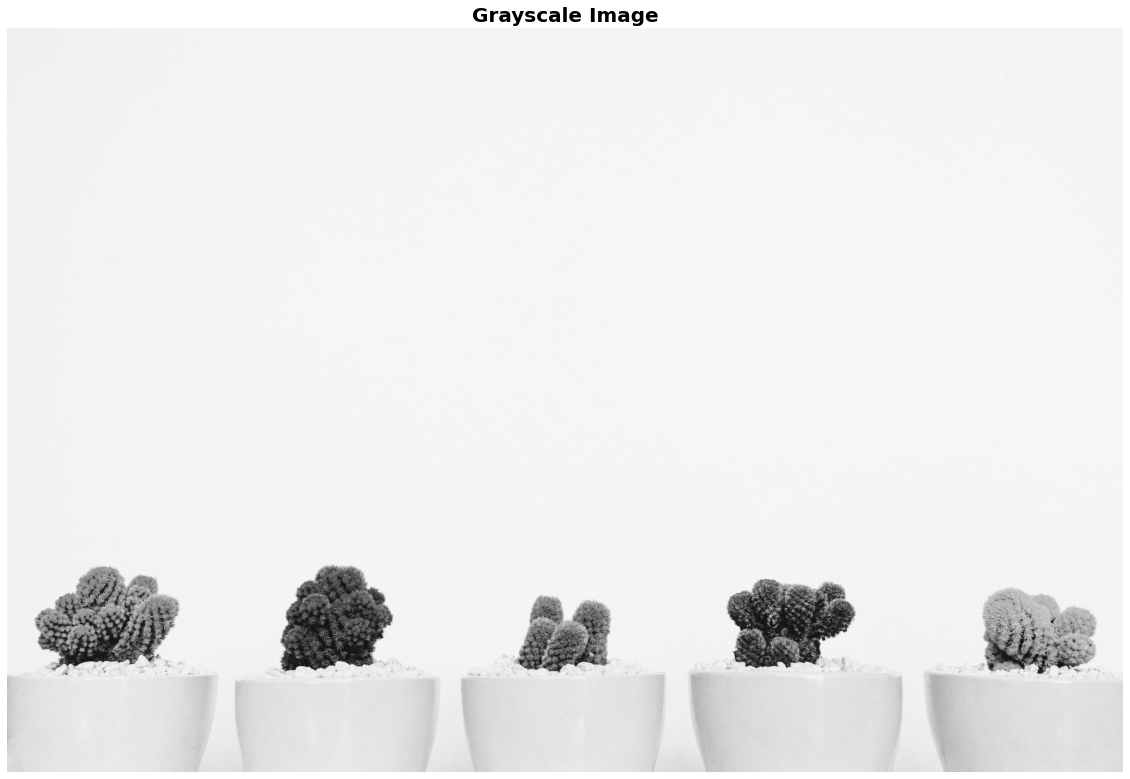

In [13]:
# Convert the image to grayscale
gray_image = rgb2gray(original_image)
plt.figure(figsize=(20,20))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image', fontsize=20, weight='bold')
plt.axis('off')
plt.show()

Grayscale Image. Photo by Scott Webb on Unsplash, processed by the Author.

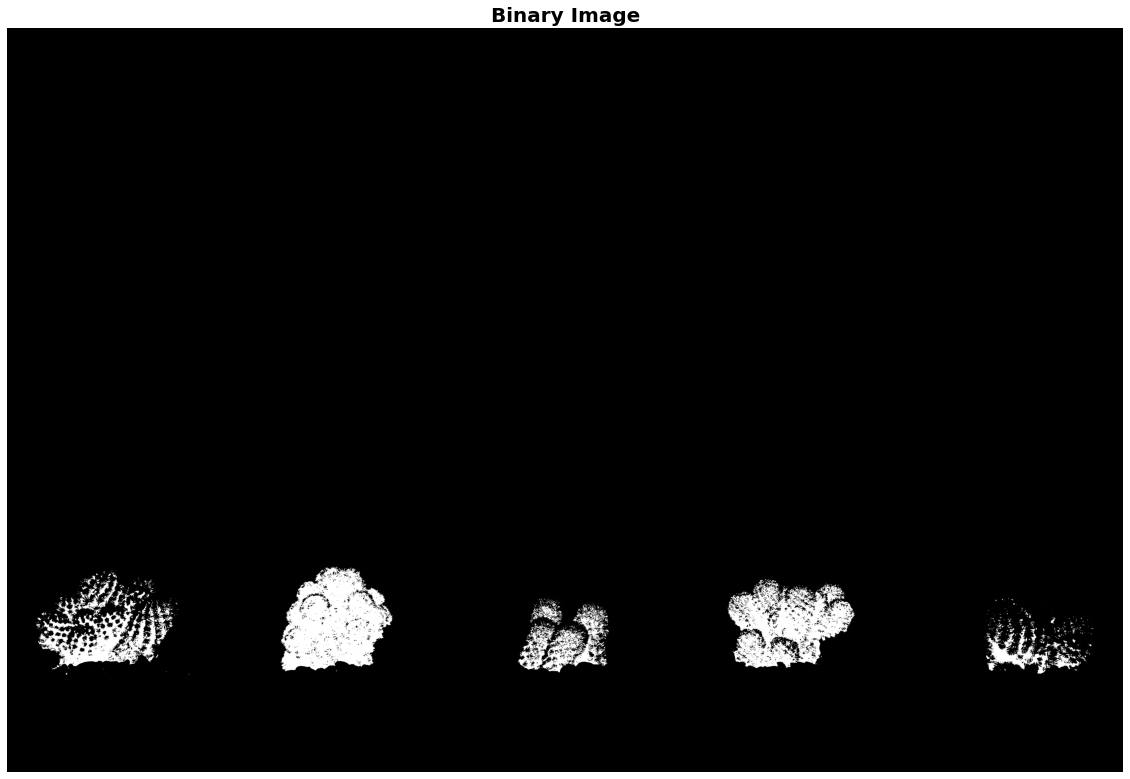

In [15]:
# Convert the grayscale image to binary image using threshold=0.50
threshold = 0.5
binary_image = gray_image<threshold
plt.figure(figsize=(20,20))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image', fontsize=20, weight='bold')
plt.axis('off')
plt.show()

Binary Image. Photo by Scott Webb on Unsplash, processed by the Author.

Notice how the originally lighter parts of the image turned black. This is because we used 0.50 as our threshold.

But in **Otsu's Method**, we don't have to manually set the threshold, we can let Otsu handle that job for us by calling `threshold_otsu` function and use it in our `gray_image` as follows:

Otsu's Threshold: 0.67


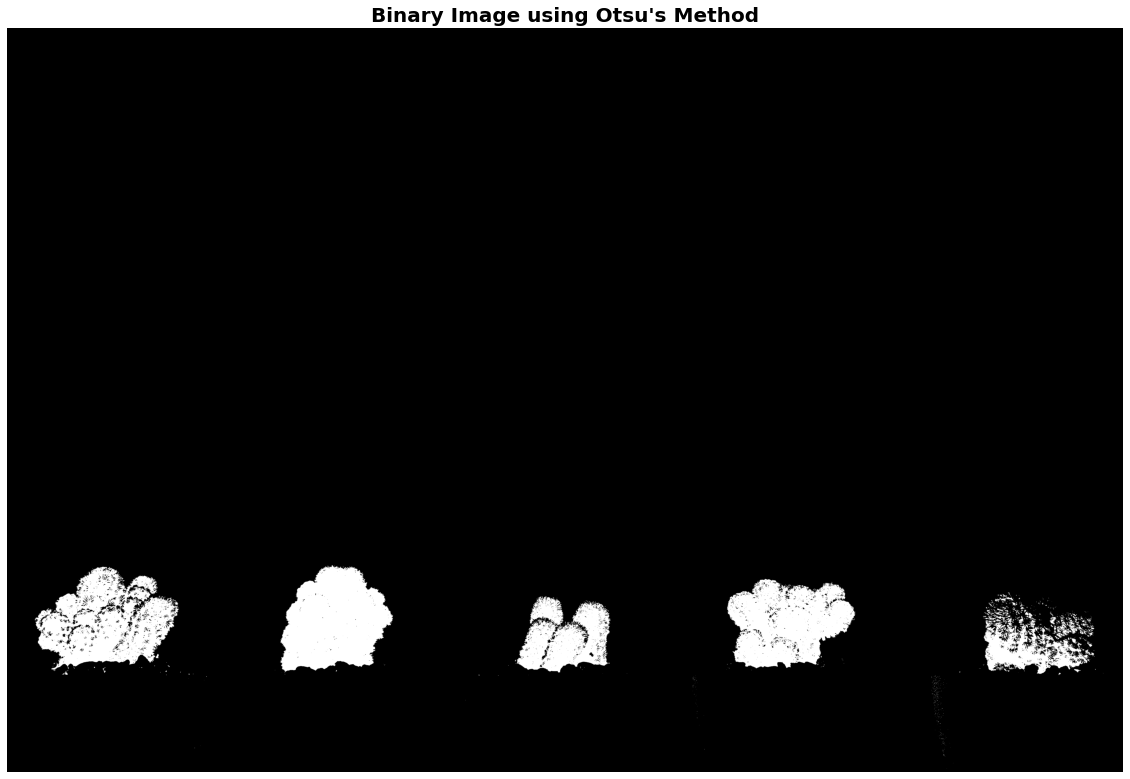

In [18]:
# Use threshold_otsu to automatically calculate the optimal threshold
threshold = threshold_otsu(gray_image)
print(f"Otsu's Threshold: {threshold:.2f}")
binary_image_otsu  = gray_image < threshold
plt.figure(figsize=(20,20))
plt.imshow(binary_image_otsu, cmap='gray')
plt.title("Binary Image using Otsu's Method", fontsize=20, weight='bold')
plt.axis('off')
plt.show()

Binary Image using Otsu’s Method. Photo by Scott Webb on Unsplash, processed by the Author.

See the difference? We don’t have to manually trial and error on our threshold values just to get a better binarized image. We saved time, thanks to Otsu’s Method!

---
<h2 style="color:#ff0090">B. Color Image Segmentation 🌈</h2>

Suppose we want to isolate only the verdant plant life in our image, then it’s time for another exciting technique — Color Image Segmentation! This method is an extension of thresholding, but here’s the twist: instead of intensity, we’re using color information to separate objects. It’s particularly useful when the objects of interest in an image are dressed in distinctive colors. 🎯

Now, let’s venture into the different color spaces, like `RGB` and `HSV`, and witness how switching between these spaces can drastically uplift our segmentation results.

---
<h3 style="color:#9e02bb">RGB Color Space 🔴🟢🔵</h3>

Let's cast our eyes on our original image once more.

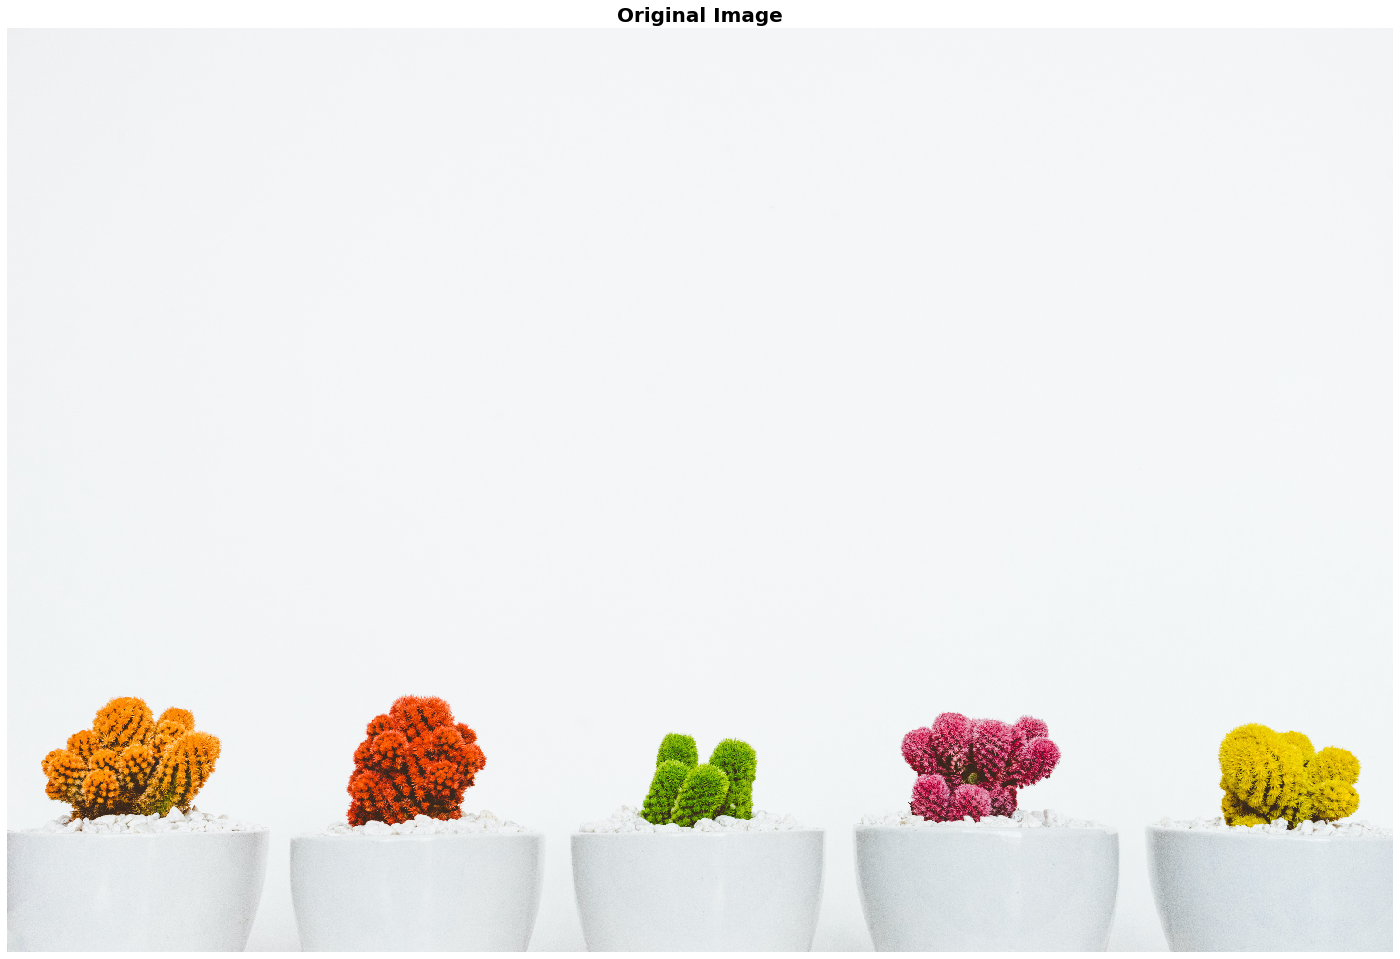

In [24]:
original_image = imread('plants.jpg')
plt.figure(figsize=(20,20))
imshow(original_image)
plt.title('Original Image', fontsize=20, weight='bold')
plt.axis('off')
plt.show()

Photo by Scott Webb on Unsplash

To isolate only the lush **green** plant, we can perform a simple segmentation operation. The RGB channels can be accessed in the image like so:

In [30]:
img = original_image.copy()

# Separate the red, green, and blue channels
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

We can use <b>comparative operators</b> below to say that a pixel is <b>green</b> if the green channel value is greater than both the red and blue channel values. This can work well if green is the dominant color in the image. And as you can see below, I was able to successfully segment the green color in the image by just using comparative operators about what we know about the RGB channels.

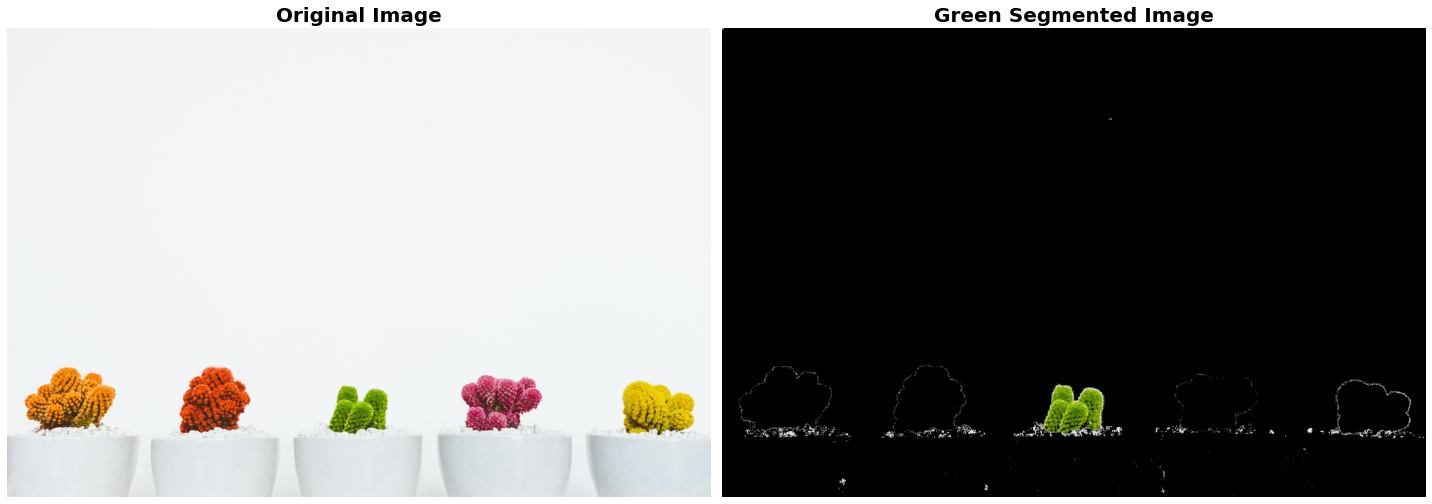

In [50]:
# Read image using skimage
original_image = imread('plants.jpg')

# Create subplot of 1x2
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Plot original image
ax[0].imshow(original_image)
ax[0].set_title('Original Image', fontsize=20, weight='bold')
ax[0].axis('off')

# Get red, green, and blue channels
r = original_image[:, :, 0]
g = original_image[:, :, 1]
b = original_image[:, :, 2]

# create a mask for green color
mask = (g > r) & (g > b) # adjust these values depending on what you consider to be 'green'

# create a new image
new_img = original_image.copy()

# apply mask to all channels
new_img[:, :, 0] = new_img[:, :, 0] * mask
new_img[:, :, 1] = new_img[:, :, 1] * mask
new_img[:, :, 2] = new_img[:, :, 2] * mask

# plot the green segmented image
ax[1].imshow(new_img)
ax[1].set_title('Green Segmented Image', fontsize=20, weight='bold')
ax[1].axis('off')

# display the subplot
plt.tight_layout()
plt.show()

(Left) Photo by Scott Webb on Unsplash | (Right) Photo processed by Author.


Notice how there are white marks left in the green segmented image?

White is a color where red, green, and blue all are at their peak. Therefore, to keep these unwanted guests at bay, we can add a white mask to our code:

```Python

# Create a mask for white color
white_threshold = 180  # adjust this depending on what you consider to be 'white'
white_mask = (r > white_threshold) & (g > white_threshold) & (b > white_threshold)

# Combine the green and white masks
mask = green_mask & ~white_mask  # ~ is the NOT operator

```

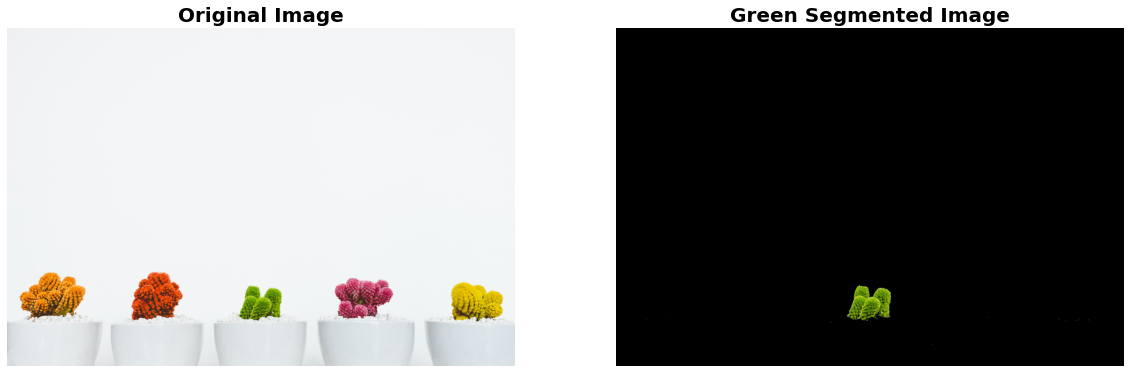

In [76]:
# Read image using skimage
original_image = io.imread('plants.jpg')

# Create subplot of 1x2
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Plot original image
ax[0].imshow(original_image)
ax[0].set_title('Original Image', fontsize=20, weight='bold')
ax[0].axis('off')

# Get red, green, and blue channels
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]

# Create a mask for green color
green_mask = (g > r) & (g > b)

# Create a mask for white color
white_threshold = 180  # adjust this depending on what you consider to be 'white'
white_mask = (r > white_threshold) & (g > white_threshold) & (b > white_threshold)

# Combine the green and white masks
mask = green_mask & ~white_mask  # ~ is the NOT operator

# Create a new image and apply mask
new_img = original_image.copy()

# Apply mask to all channels
new_img[:,:,0] = new_img[:,:,0] * mask
new_img[:,:,1] = new_img[:,:,1] * mask
new_img[:,:,2] = new_img[:,:,2] * mask

# Plot the green segmented image
ax[1].imshow(new_img)
ax[1].set_title('Green Segmented Image', fontsize=20, weight='bold')
ax[1].axis('off');

(Left) Photo by Scott Webb on Unsplash | (Right) Photo processed by Author.

Well done!

Apart from comparative operators, we have a few other tools in our arsenal:

- **Using thresholds**: You can select a threshold and say that a pixel is green if its green channel value is above this threshold. This threshold can be chosen based on the specific shades of green you're interested in.

```Python
mask = (g > some_green_threshold)
```

- **Using ranges**: Instead of just saying a pixel is green if its green channel value is above a certain threshold, you can define a range for the green channel values and also specify that the red and blue channel values should be below certain thresholds.

```Python 
mask = ((g > lower_green_threshold) & (g < upper_green_threshold)) & (r < some_red_threshold) & (b < some_blue_threshold)
```

- **Using color spaces**: Instead of working in the RGB color space, sometimes it's easier to segment colors in other color spaces like `HSV` (Hue, Saturation, Value). In the HSV color space, different colors are arranged on a circle (the hue), and so picking out a specific color may be easier.

The above `RGB` technique worked a treat, but what if we had to isolate the orange plant? 🌸 The RGB space would leave us in a bit of a pickle. That's where the magic of HSV color space can save the day!

---
<h3 style="color:#9e02bb">HSV Color Space</h3>

As mentioned above, instead of working in the RGB color space, sometimes it's easier to segment colors in other color spaces like `HSV` (Hue, Saturation, Value). In the HSV color space, different colors are arranged on a circle (the hue), and so picking out a specific color may be easier.

Let's display the Hue, Saturation, and Value of our original image:

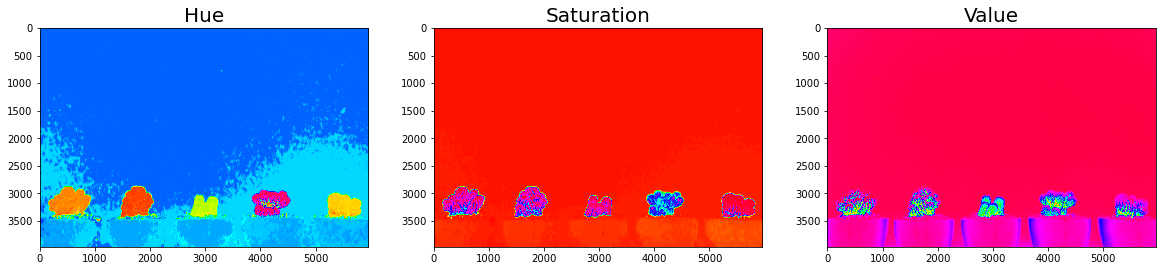

In [62]:
# Read image using skimage
original_image = imread('plants.jpg')

# Convert the image to HSV color space
hsv_img = rgb2hsv(original_image)

fig, ax = plt.subplots(1, 3, figsize=(20,20))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('Hue', fontsize=20)
ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('Saturation', fontsize=20)
ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('Value', fontsize=20);

HSV plot of the original image. Photo by Author.

Since it's difficult to see the difference in intensity values using the above plot, let's use `colorbar()`:

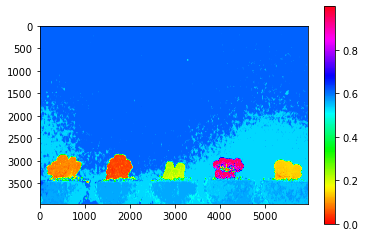

In [63]:
plt.imshow(hsv_img[:,:,0], cmap='hsv')
plt.colorbar()

Plot of the Hue with colorbar. Photo by Author.

As you can see, orange is between 0 to 0.05, so let's use those as our threshold:

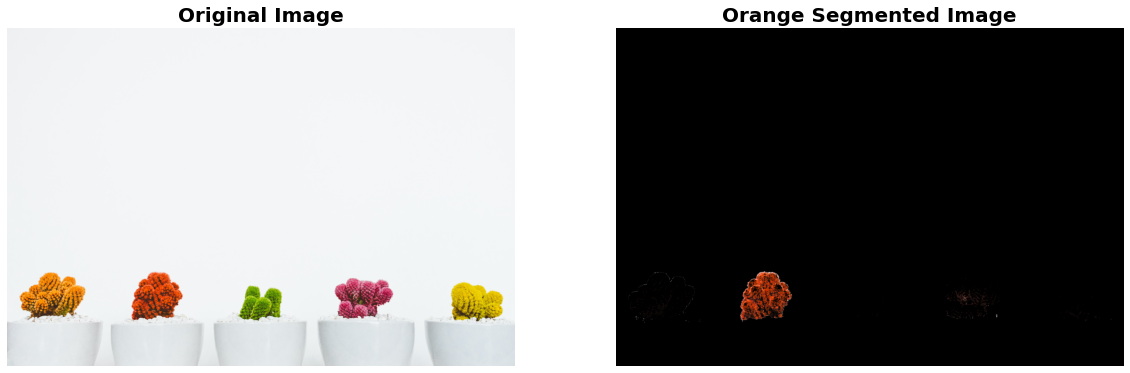

In [71]:
# Read image using skimage
original_image = imread('plants.jpg')

# Convert the image to HSV color space
hsv_img = rgb2hsv(original_image)

# Create a mask for orange color
# Hue for orange is roughly in the range of 0 - 0.05
# We can play around these values to adapt to our specific color requirement
mask = (hsv_img[:,:,0] > 0) & (hsv_img[:,:,0] < 0.05)

# create a new image and apply mask
new_img = original_image.copy()

new_img[:,:,0] = new_img[:,:,0] * mask
new_img[:,:,1] = new_img[:,:,1] * mask
new_img[:,:,2] = new_img[:,:,2] * mask

# plot the original and segmented images side by side
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].imshow(original_image)
ax[0].set_title('Original Image', fontsize=20, weight='bold')
ax[0].axis('off')

ax[1].imshow(new_img)
ax[1].set_title('Orange Segmented Image', fontsize=20, weight='bold')
ax[1].axis('off')

plt.show()

(Left) Photo by Scott Webb on Unsplash | (Right) Photo processed by Author.

And voilà! We've successfully segmented out the vibrant hues of orange in our plant image.

---
<h2 style="color:#ff0090">Conclusion 🏁</h2>

Whew, what a journey we’ve had today! Our deep dive into image segmentation has certainly painted a vibrant picture of how we can distill meaningful information from our images. 🖼️🔍 From the fundamental idea of thresholding, through the magic of Otsu’s method, to our vivid journey through color image segmentation, we’ve touched upon some key techniques that form the cornerstone of image processing. 🌈⚖️

Remember, these aren’t just methods, they’re powerful tools you can harness to illuminate the hidden secrets within your images! Whether it’s isolating the verdant leaves of a plant in the RGB color space, or teasing out the vibrant hues of a flower using Otsu’s method, you’re now equipped with the knowledge to take on more complex image processing challenges! 🍃🌼

But don’t close your notebooks just yet! We’ve only scratched the surface of image segmentation. In the next episode, we’ll be delving into the colorful world of chromaticity segmentation and exploring the fascinating concept of image differencing. So, stay curious and keep those coding fingers ready! 🎨💻

So, until next time, keep exploring, keep learning, and remember: every pixel tells a story! 🧠💡🎈

Happy coding, and see you in the next episode! 🚀👩‍💻👨‍💻🌟

---
<h2 style="color:#ff0090">References</h2>

- Borja, B. (2023). Lecture 5: Image Segmentation Part 1 [Jupyter Notebook]. Introduction to Image Processing 2023, Asian Institute of Management.